In [114]:
library(tidyverse)

combi <- read_csv("data-clean/final_combi.csv")
combizs <- read_csv("data-clean/final_combi_zs.csv")

# Add date to combi zs
date_seq = seq(as.Date("2005-01-01"), by = "1 month", length.out = nrow(combizs))
combizs_d <- merge(combizs, date_seq, all = T)
combizs_d <- combizs_d %>% 
   rename(Date = y)

# Format date for combi
combi$Date = as.Date(combi$Date, "%Y-%m-%d")
head(combizs_d)

Parsed with column specification:
cols(
  asx = col_double(),
  oecd_li = col_double(),
  abs_imports = col_double(),
  abs_exports = col_double(),
  gold_price_london_fixing = col_double(),
  unemployment = col_double(),
  rba_cash_rate = col_double(),
  yearly_inflation = col_double(),
  quarterly_inflation = col_double(),
  exchange_rate = col_double(),
  djia = col_double(),
  pe_ratio = col_double(),
  dividend = col_double(),
  iron = col_double(),
  oil = col_double(),
  Date = col_date(format = "")
)

Parsed with column specification:
cols(
  asx = col_double(),
  oecd_li = col_double(),
  abs_imports = col_double(),
  abs_exports = col_double(),
  gold_price_london_fixing = col_double(),
  unemployment = col_double(),
  rba_cash_rate = col_double(),
  yearly_inflation = col_double(),
  quarterly_inflation = col_double(),
  exchange_rate = col_double(),
  djia = col_double(),
  pe_ratio = col_double(),
  dividend = col_double(),
  iron = col_double(),
  oil = col_double(),
  bi

asx,oecd_li,abs_imports,abs_exports,gold_price_london_fixing,unemployment,rba_cash_rate,yearly_inflation,quarterly_inflation,exchange_rate,djia,pe_ratio,dividend,iron,oil,binary_asx,Date
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
-0.0919866,0.31143224,-0.09293992,-0.1362956,-0.1490893,-0.5218247,0.7768562,0.08319780,1.0647636,-0.001635169,-0.1588076,1.017099712,-1.0827281,-0.1228761,-0.05548997,0,2005-01-01
0.3348902,0.21481273,-0.12807143,0.2260361,-0.7911738,0.3982231,0.7768562,0.08319780,1.0647636,0.588303984,0.5253308,0.100878555,-0.7513391,-0.1228761,0.18653953,1,2005-01-01
-0.4930153,0.10191890,1.67976169,1.0964498,0.4467473,0.6062081,1.0295160,0.08319780,1.0647636,-0.669298860,-0.7915941,0.004434222,-0.5856445,-0.1228761,1.36643333,0,2005-01-01
-0.9128014,0.02435938,-0.22047912,1.1817065,-0.5596643,0.1588466,1.0295160,-0.02902249,-0.2548152,0.336564731,-0.9286751,-0.284898775,-0.4199500,-0.1228761,-0.26614527,0,2005-01-01
0.7283235,-0.03273264,0.12445361,0.4864345,0.1149792,-0.2139090,1.0295160,-0.02902249,-0.2548152,-0.924363315,0.5401630,-0.284898775,-0.4199500,-0.1228761,-0.69937976,1,2005-01-01
1.0207510,-0.09294756,-0.07548149,-0.7128909,-0.8942966,-0.3115299,1.0295160,-0.02902249,-0.2548152,0.298756064,-0.6357756,0.149100721,-0.7513391,-0.1228761,1.30955640,1,2005-01-01


In [41]:
glimpse(combi)

Observations: 175
Variables: 16
$ asx                      <dbl> 4107, 4173, 4110, 3983, 4106, 4278, 4389, 44…
$ oecd_li                  <dbl> 100.21160, 100.14570, 100.06870, 100.01580, …
$ abs_imports              <dbl> 11154780, 11123461, 12699350, 12569908, 1278…
$ abs_exports              <dbl> 9232638, 9503409, 10451659, 11566650, 121496…
$ gold_price_london_fixing <dbl> 438.00, 423.80, 436.55, 427.50, 433.20, 416.…
$ unemployment             <dbl> 5.056507, 5.660385, 5.796897, 5.503269, 5.25…
$ rba_cash_rate            <dbl> 5.25, 5.25, 5.50, 5.50, 5.50, 5.50, 5.50, 5.…
$ yearly_inflation         <dbl> 2.5, 2.5, 2.5, 2.4, 2.4, 2.4, 2.5, 2.5, 2.5,…
$ quarterly_inflation      <dbl> 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6,…
$ exchange_rate            <dbl> 0.7744, 0.7905, 0.7719, 0.7811, 0.7557, 0.76…
$ djia                     <dbl> 10490, 10766, 10504, 10193, 10467, 10275, 10…
$ pe_ratio                 <dbl> 17.0, 15.1, 14.9, 14.3, 14.3, 15.2, 15.6, 16…
$ dividend          

In [42]:
combi %>% summarise_all(funs(sum(is.na(.))))

asx,oecd_li,abs_imports,abs_exports,gold_price_london_fixing,unemployment,rba_cash_rate,yearly_inflation,quarterly_inflation,exchange_rate,djia,pe_ratio,dividend,iron,oil,Date
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0


In [43]:
combi %>%
     rowid_to_column() %>%
     filter(is.na(abs_imports))

rowid,asx,oecd_li,abs_imports,abs_exports,gold_price_london_fixing,unemployment,rba_cash_rate,yearly_inflation,quarterly_inflation,exchange_rate,djia,pe_ratio,dividend,iron,oil,Date
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
175,6841,100.3387,NA,NA,1413.2,5.246242,NA,NA,NA,0.6894,28385,18.1,4,112,49,2019-07-01


In [44]:
combi <- combi %>% drop_na()

In [45]:
glimpse(combi)

Observations: 174
Variables: 16
$ asx                      <dbl> 4107, 4173, 4110, 3983, 4106, 4278, 4389, 44…
$ oecd_li                  <dbl> 100.21160, 100.14570, 100.06870, 100.01580, …
$ abs_imports              <dbl> 11154780, 11123461, 12699350, 12569908, 1278…
$ abs_exports              <dbl> 9232638, 9503409, 10451659, 11566650, 121496…
$ gold_price_london_fixing <dbl> 438.00, 423.80, 436.55, 427.50, 433.20, 416.…
$ unemployment             <dbl> 5.056507, 5.660385, 5.796897, 5.503269, 5.25…
$ rba_cash_rate            <dbl> 5.25, 5.25, 5.50, 5.50, 5.50, 5.50, 5.50, 5.…
$ yearly_inflation         <dbl> 2.5, 2.5, 2.5, 2.4, 2.4, 2.4, 2.5, 2.5, 2.5,…
$ quarterly_inflation      <dbl> 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6,…
$ exchange_rate            <dbl> 0.7744, 0.7905, 0.7719, 0.7811, 0.7557, 0.76…
$ djia                     <dbl> 10490, 10766, 10504, 10193, 10467, 10275, 10…
$ pe_ratio                 <dbl> 17.0, 15.1, 14.9, 14.3, 14.3, 15.2, 15.6, 16…
$ dividend          

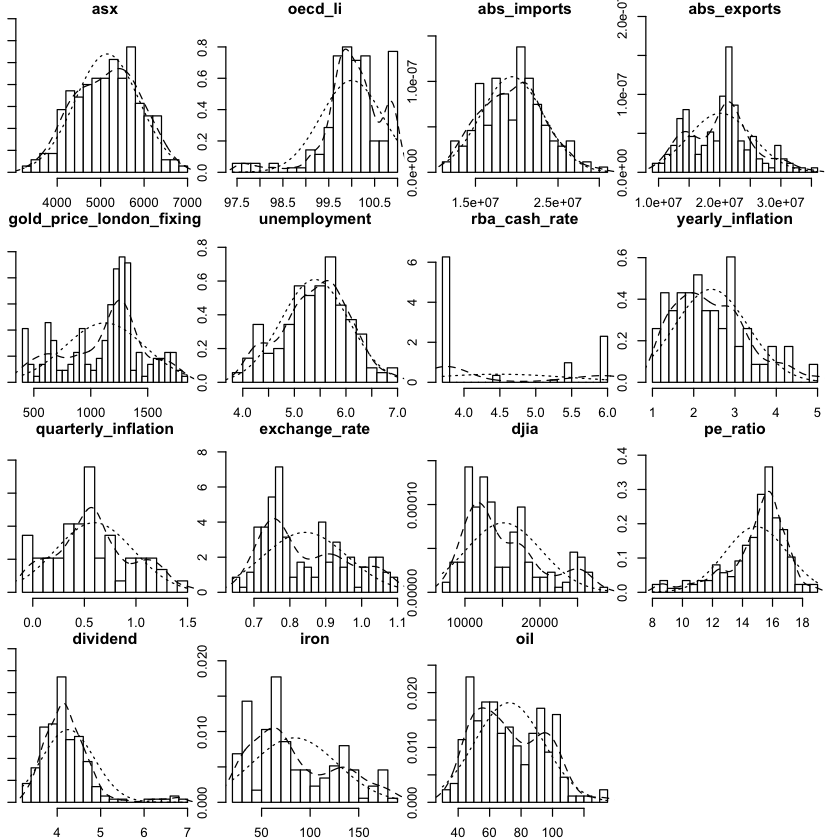

In [77]:
library(psych)
combi %>%
  keep(is.numeric) %>% 
    multi.hist() 

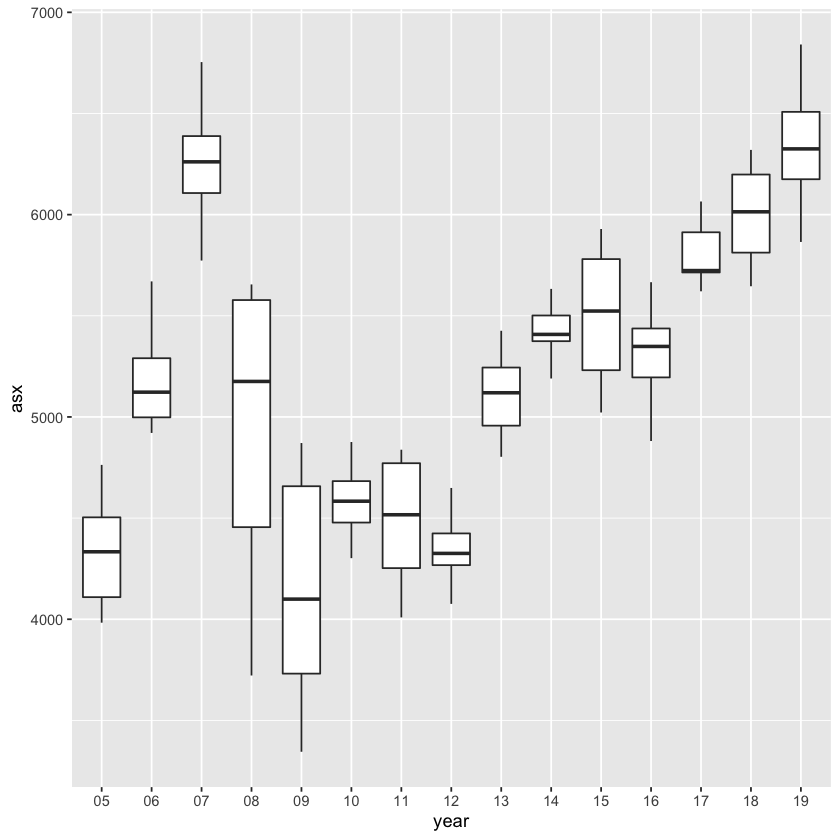

In [117]:
combi %>%
mutate(year = format(Date, "%y")) %>%
ggplot(mapping = aes(x = year, y = asx)) +
  geom_boxplot()

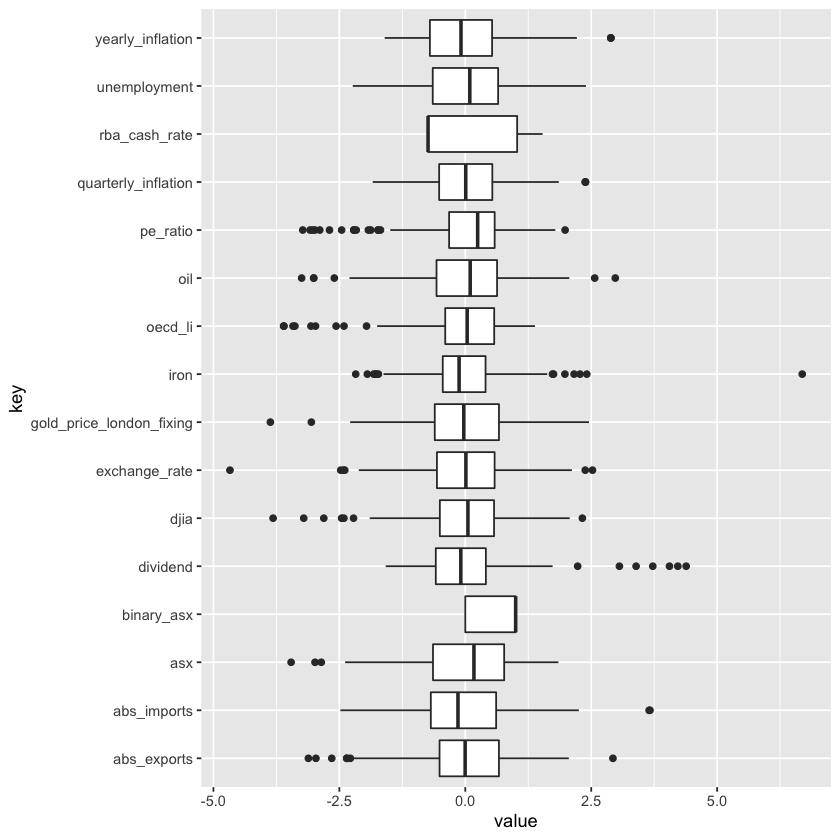

In [168]:
combizs %>%
  keep(is.numeric) %>% 
  gather() %>%
  ggplot(mapping = aes(x = key, y = value)) +
  geom_boxplot() +
  coord_flip()

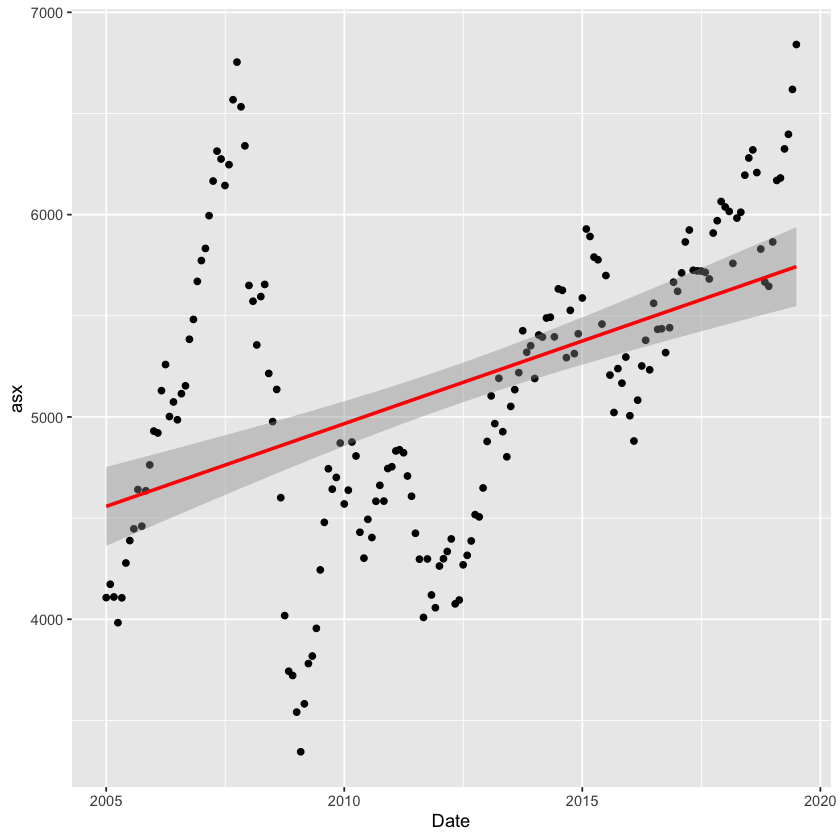

In [124]:
combi %>% ggplot(aes(x = Date, y = asx)) + 
  geom_point() +
  stat_smooth(method = "lm", col = "red")

In [ ]:
library(ggplot2)
library(reshape2)
meltdf <- melt(combi,id="Date")
ggplot(meltdf,aes(x=Date,y=value,colour=variable,group=variable)) + geom_line()

In [ ]:
combizs %>%
  keep(is.numeric) %>% 
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

In [132]:
ggplot(combi, aes(Date, asx)) + geom_line() +
 xlab("Date") + ylab("ASX Index") + ggtitle("Value of ASX 200 Index Over time") +
 annotate(geom="text", x=as.Date("2009-01-01"), y=7000,
          label="Market Peak before 2008 GFC (Sep 2007)") +
 annotate(geom="text", x=as.Date("2010-01-01"), y=3200,
          label="Market Trough (Jan 2009)") +
 coord_cartesian(clip = 'off') +
 annotate(geom="point", x=as.Date("2007-09-30"), y=6754, size=8, shape=21, fill="transparent") +
 annotate(geom="point", x=as.Date("2009-01-31"), y=3400, size=8, shape=21, fill="transparent") +
 geom_smooth(method='lm') +
 theme_ipsum()

ERROR: Error in theme_ipsum(): could not find function "theme_ipsum"


In [147]:
is.sorted = Negate(is.unsorted)
is.sorted(combi$asx)

[1] FALSE

In [157]:
head(combizs)

asx,oecd_li,abs_imports,abs_exports,gold_price_london_fixing,unemployment,rba_cash_rate,yearly_inflation,quarterly_inflation,exchange_rate,djia,pe_ratio,dividend,iron,oil,binary_asx
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.0919866,0.31143224,-0.09293992,-0.1362956,-0.1490893,-0.5218247,0.7768562,0.08319780,1.0647636,-0.001635169,-0.1588076,1.017099712,-1.0827281,-0.1228761,-0.05548997,0
0.3348902,0.21481273,-0.12807143,0.2260361,-0.7911738,0.3982231,0.7768562,0.08319780,1.0647636,0.588303984,0.5253308,0.100878555,-0.7513391,-0.1228761,0.18653953,1
-0.4930153,0.10191890,1.67976169,1.0964498,0.4467473,0.6062081,1.0295160,0.08319780,1.0647636,-0.669298860,-0.7915941,0.004434222,-0.5856445,-0.1228761,1.36643333,0
-0.9128014,0.02435938,-0.22047912,1.1817065,-0.5596643,0.1588466,1.0295160,-0.02902249,-0.2548152,0.336564731,-0.9286751,-0.284898775,-0.4199500,-0.1228761,-0.26614527,0
0.7283235,-0.03273264,0.12445361,0.4864345,0.1149792,-0.2139090,1.0295160,-0.02902249,-0.2548152,-0.924363315,0.5401630,-0.284898775,-0.4199500,-0.1228761,-0.69937976,1
1.0207510,-0.09294756,-0.07548149,-0.7128909,-0.8942966,-0.3115299,1.0295160,-0.02902249,-0.2548152,0.298756064,-0.6357756,0.149100721,-0.7513391,-0.1228761,1.30955640,1


,asx,oecd_li,abs_imports,abs_exports,gold_price_london_fixing,unemployment,rba_cash_rate,yearly_inflation,quarterly_inflation,exchange_rate,djia,pe_ratio,dividend,iron,oil
asx,0.00,0.99,1.05,1.04,1.02,0.84,1.01,1.23,1.23,0.57,0.30,0.74,1.29,1.05,0.76
oecd_li,0.99,0.00,0.93,0.88,0.97,1.10,1.18,1.18,0.81,1.02,0.94,0.46,1.70,0.95,0.97
abs_imports,1.05,0.93,0.00,0.81,0.97,0.95,0.99,0.98,0.92,1.06,1.00,0.95,1.11,1.03,0.91
abs_exports,1.04,0.88,0.81,0.00,0.83,0.95,1.02,0.99,0.89,1.18,1.08,0.94,1.12,1.09,0.99
gold_price_london_fixing,1.02,0.97,0.97,0.83,0.00,1.06,0.88,0.96,0.90,1.01,1.12,1.11,1.03,0.88,0.91
unemployment,0.84,1.10,0.95,0.95,1.06,0.00,1.61,1.51,1.40,0.94,0.81,0.56,0.92,1.16,0.91


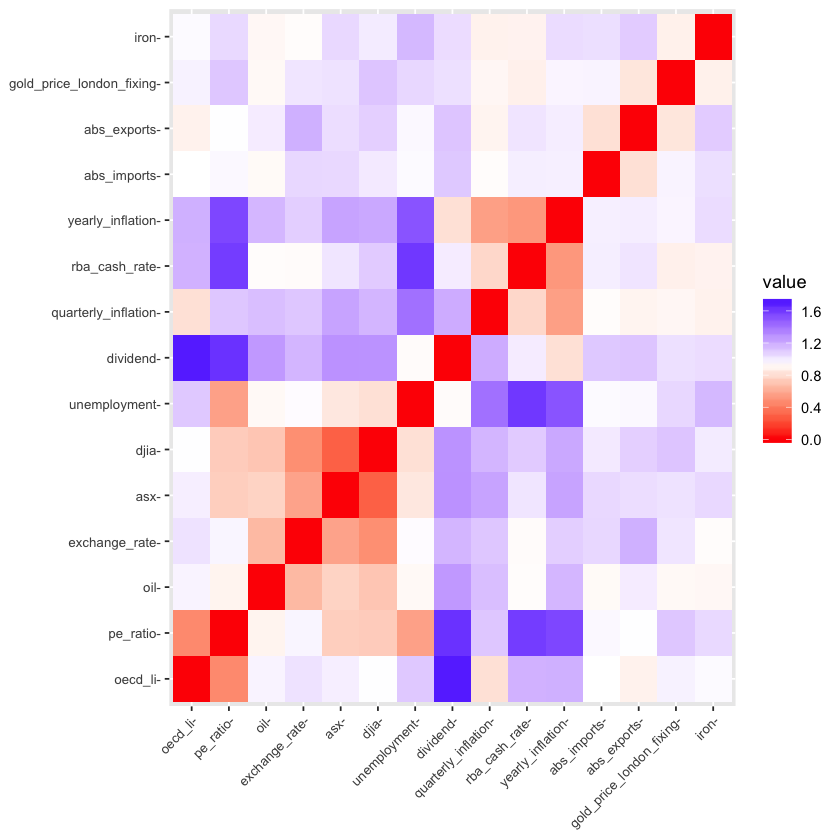

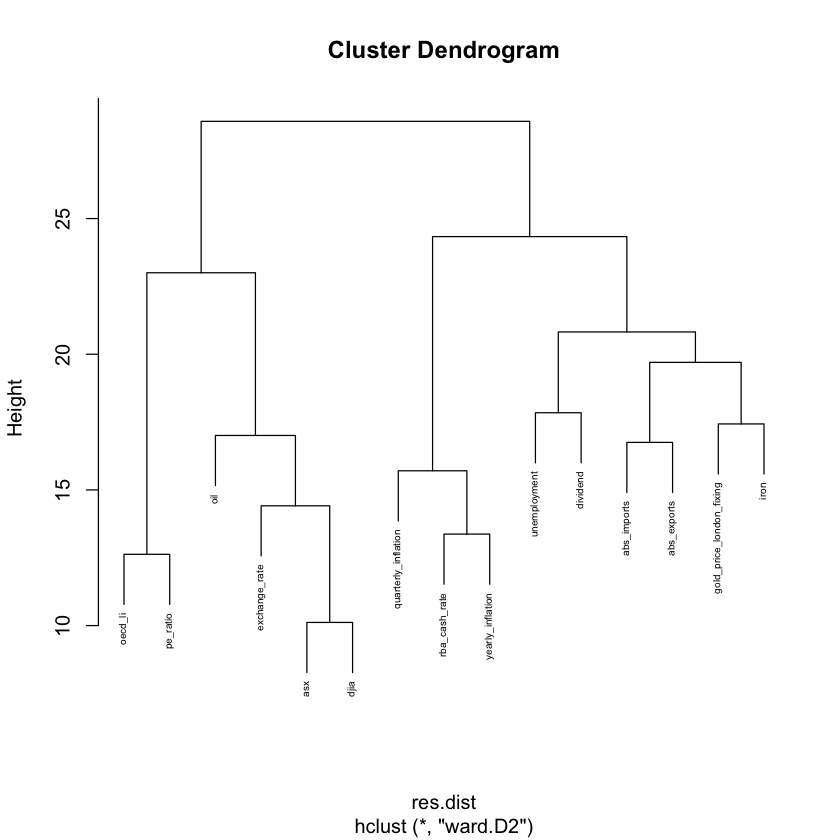

In [159]:
library(factoextra)
df <- t(combizs[,c("asx","oecd_li","abs_imports",
                   "abs_exports","gold_price_london_fixing",
                   "unemployment","rba_cash_rate",
                   "yearly_inflation","quarterly_inflation",
                   "exchange_rate","djia","pe_ratio",
                   "dividend","iron","oil")])
# Correlation-based distance method
res.dist <- get_dist(df, method = "pearson")
head(round(as.matrix(res.dist), 2))[, 1:15]
# Visualize the dissimilarity matrix
# 0 means closer together, larger numbers further away
# we can see clusters around market data, eg stocks, fx
# and also around interest rates eg cash rate inflation
fviz_dist(res.dist, lab_size = 8)
# Compute dissimilarity Euclidean matrix
res.dist <- dist(df, method = "euclidean")
# Compute hierarchical clustering
res.hc <- hclust(res.dist, method = "ward.D2")
# Visualize
plot(res.hc, cex = 0.5)

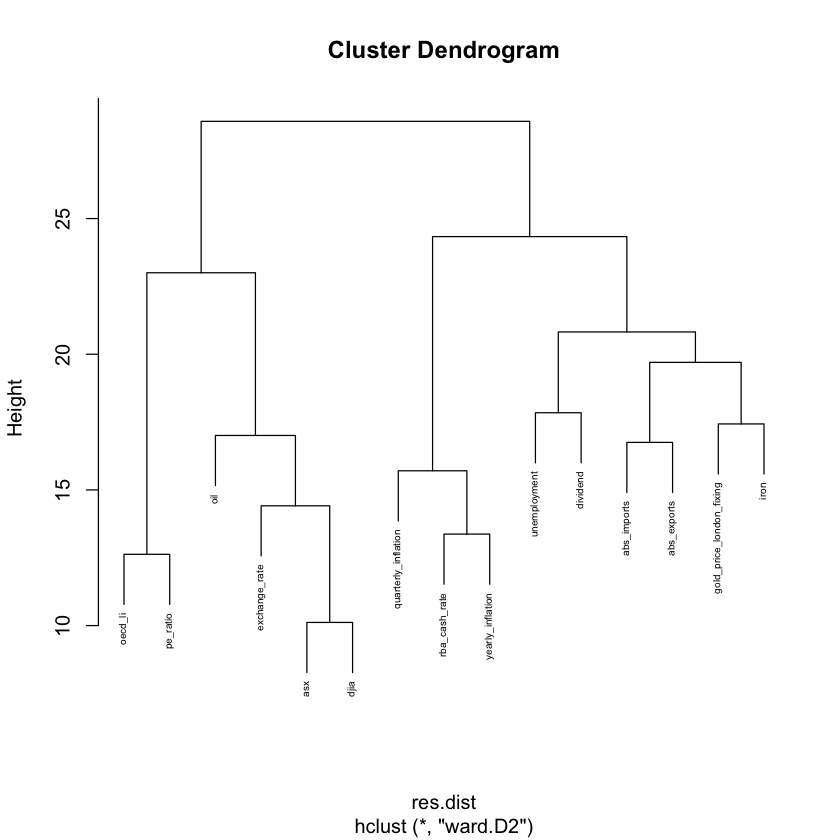

ERROR: Error in fviz_gap_stat(res.km$gap_stat): Only an object of class clusGap is allowed. (cluster package)


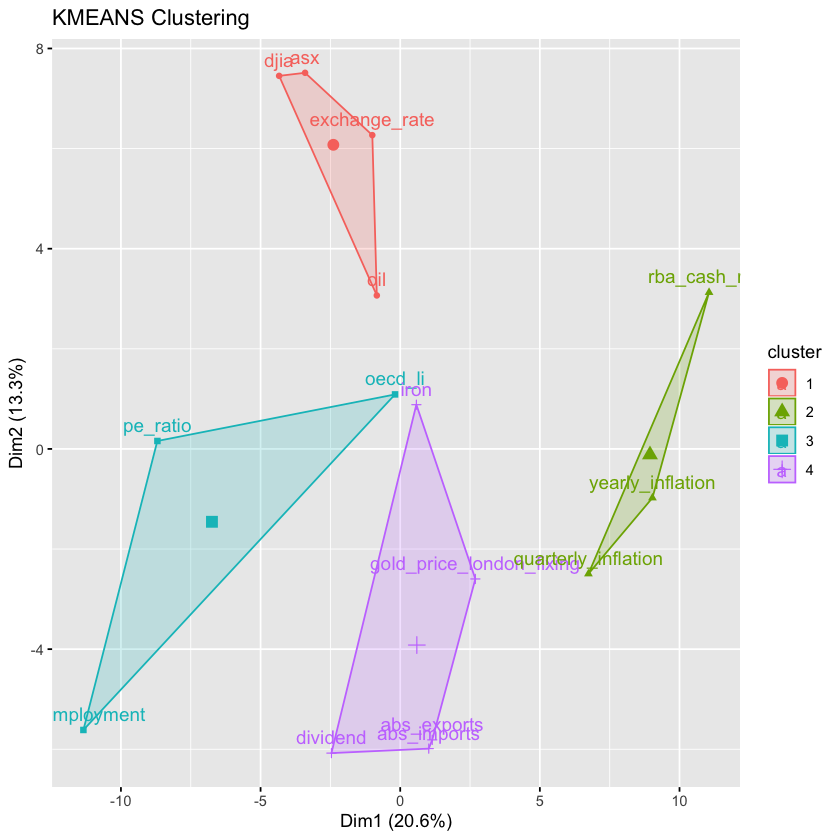

In [160]:
# Visualize
plot(res.hc, cex = 0.5)
# Enhanced k-means clustering
res.km <- eclust(df, "kmeans",k = 4, nstart = 25)
# Gap statistic plot
fviz_gap_stat(res.km$gap_stat)
# Silhouette plot
fviz_silhouette(res.km)
# Optimal number of clusters using gap statistics
res.km$nbclust
# Print result
res.km
# Enhanced hierarchical clustering
res.hc <- eclust(df,k=4, "hclust") # compute hclust
fviz_dend(res.hc, rect = TRUE) # dendrogam
fviz_silhouette(res.hc) # silhouette plot
fviz_cluster(res.hc) # scatter plot

In [ ]:
# Add binary 0 and 1 for ASX on prior month
p_xts_df <- as.data.frame(p_xts)
p_xts_df$up_down <- replace(p_xts_df$V1, which(p_xts_df$V1 <= 0), 0)
p_xts_df$up_down <- replace(p_xts_df$up_down, which(p_xts_df$up_down > 0), 1)

In [163]:
library(caret)
library(lattice)
df <- t(combizs[,c("asx","oecd_li","abs_imports",
                   "abs_exports","gold_price_london_fixing",
                   "unemployment","rba_cash_rate",
                   "yearly_inflation","quarterly_inflation",
                   "exchange_rate","djia","pe_ratio",
                   "dividend","iron","oil")])
x <- df[,1:15]
y <- df[,1]
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

NULL